In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from io import StringIO

In [8]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = requests.get(URL)
df = pd.read_csv(StringIO(resp.content.decode('utf-8')))
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


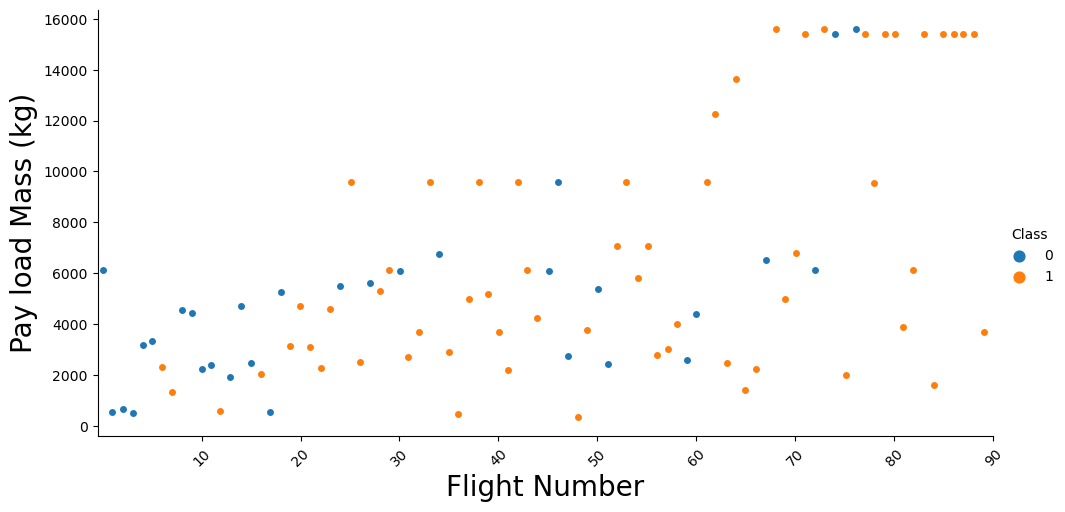

In [13]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
ticks_every_10 = range(10, df['FlightNumber'].max() + 1, 10)
plt.xticks(ticks=ticks_every_10, labels=ticks_every_10, rotation=45)
plt.show()

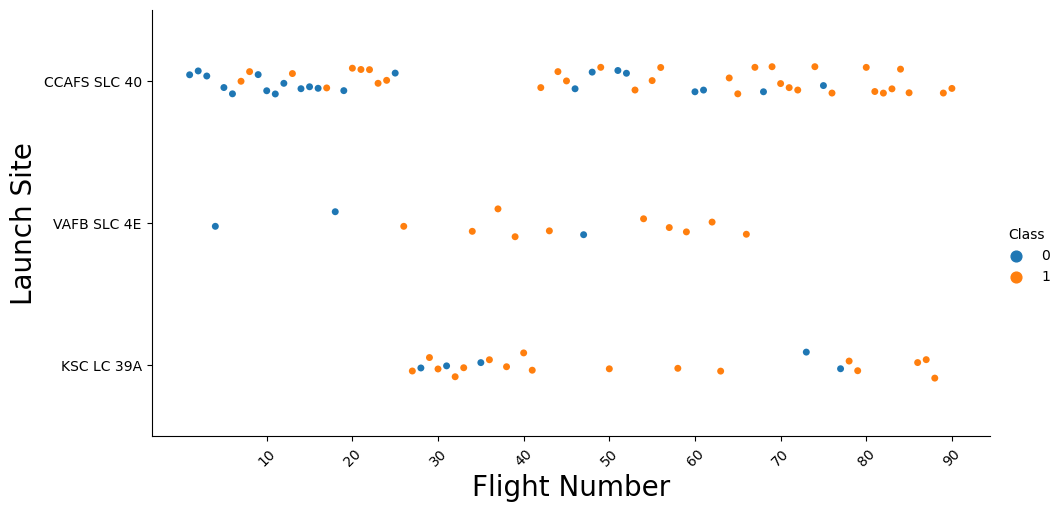

In [16]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 2)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Launch Site", fontsize = 20)
ticks_every_10 = range(10, df['FlightNumber'].max() + 1, 10)
plt.xticks(ticks=ticks_every_10, labels=ticks_every_10, rotation=45)
plt.show()
#

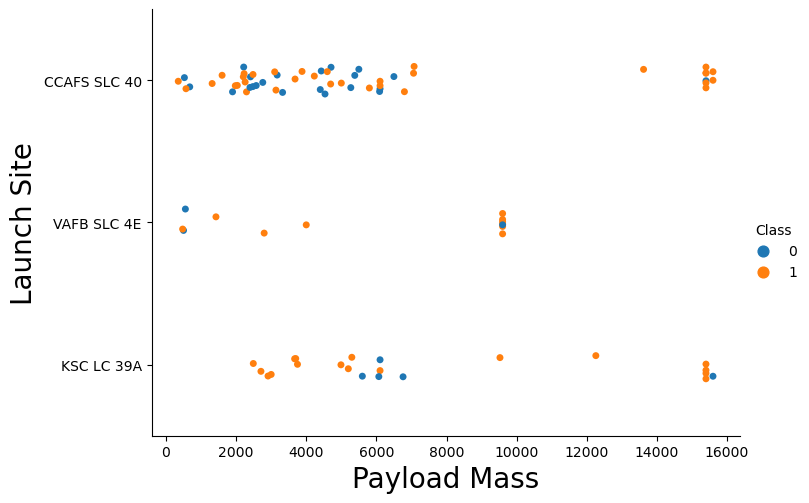

In [33]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 1.5)
plt.xlabel("Payload Mass", fontsize = 20)
plt.ylabel("Launch Site", fontsize = 20)
plt.show()
#

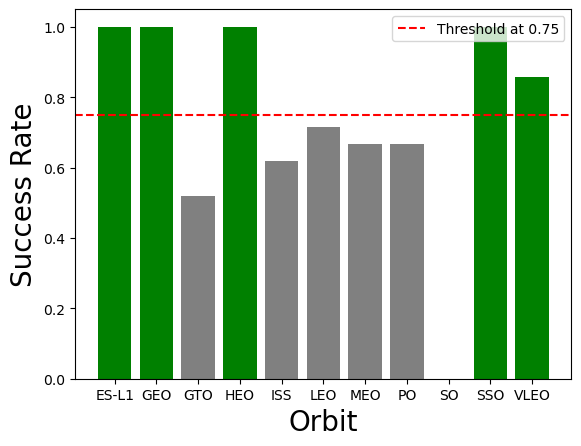

In [41]:

colors = sns.color_palette("husl", n_colors=len(df['Orbit'].unique()))

orbit_success_mean = df.groupby(['Orbit']).mean()['Class']

plt.bar(orbit_success_mean.index, orbit_success_mean, color=['green' if x > 0.75 else 'gray' for x in orbit_success_mean])

plt.axhline(y=0.75, color='red', linestyle='--', label='Threshold at 0.75')

plt.xlabel('Orbit', fontsize=20)
plt.ylabel('Success Rate', fontsize=20)
plt.legend()

plt.show()


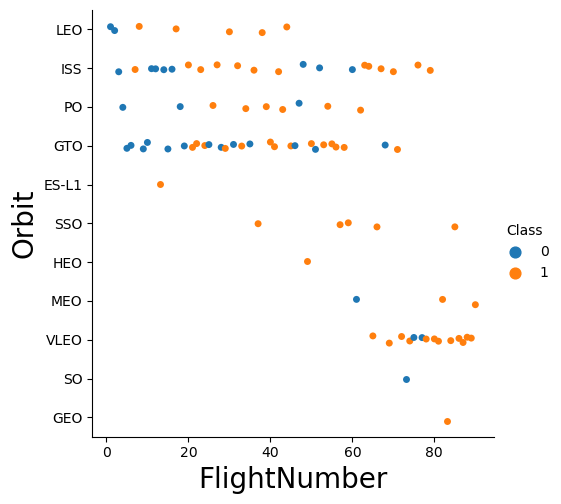

In [42]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 1)
plt.xlabel("FlightNumber", fontsize = 20)
plt.ylabel("Orbit", fontsize = 20)
plt.show()

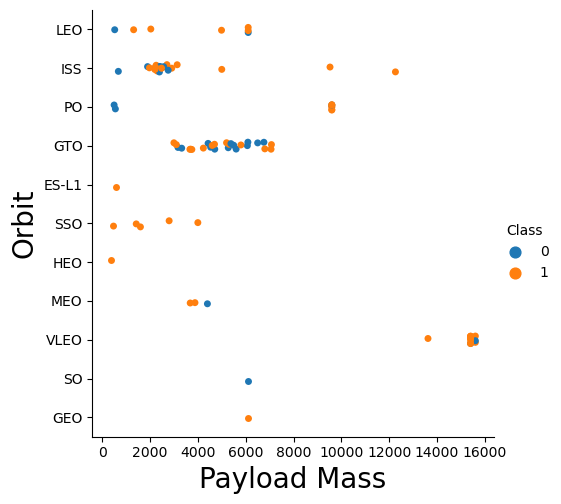

In [43]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 1)
plt.xlabel("Payload Mass", fontsize = 20)
plt.ylabel("Orbit", fontsize = 20)
plt.show()

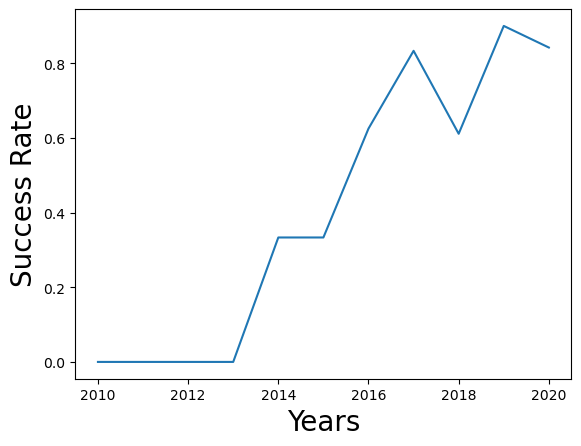

In [40]:
def Extract_year(date_series):
    return date_series.apply(lambda x: int(x.split("-")[0]))

# Assuming df is your DataFrame with a 'Date' column
df['Year'] = Extract_year(df['Date'])

# Create the line plot
sns.lineplot(x=df['Year'].unique(), y=df.groupby(['Year'])['Class'].mean())
plt.xlabel("Years", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.show()


In [41]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [44]:
features_one_hot = pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial','GridFins','Reused','Legs'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1,6104.959412,1,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,2,525.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,3,677.000000,1,1.0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
3,4,500.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,5,3170.000000,1,1.0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0


In [50]:
features_one_hot.astype('float64').dtypes
features_one_hot.to_csv('dataset_part_3.csv', index=False)